<a href="https://colab.research.google.com/github/PrathammGupta/Project_Code/blob/main/notebook596bc3961b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
- This is FIFA-20 dataset with 18,000+ rows & 100+ columns.
- Using clustering algorithms to categorize similar players using their traits and their different skills in the field.

In [145]:
#importing the required libraries
import numpy as npy
import pandas as pda
import matplotlib.pyplot as pltly
from sklearn.cluster import KMeans
from collections import Counter
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
from matplotlib import rcParams

In [146]:
# Here, we are loading the data i.e, reading the player_20.csv file.
dataset=pda.read_csv("players_20.csv",parse_dates=True)

# EDA

In [147]:
#displaying the first 4 rows of the dataset using "head()" function where 4 is given as parameter
dataset.head(4)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
#printing the number of rows and columns using "shape()" function
dataset.shape

(18278, 104)

In [149]:
#printing the columns from the dataframe
dataset.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

- As this is a football players dataset, we have a mix of all kinds of players and goal keepers. But we cannot analyse a goalkpeer in the same way as that of a player. So let us drop some columns and segregate the goal keepers from other players for separate analysis.

In [150]:
#deleting the columns which are not relevant to goal keepers for analyzation
dataset.drop(['player_url','sofifa_id','long_name','team_jersey_number','loaned_from','nation_jersey_number', \
           'player_tags','nation_position','team_jersey_number','player_positions',\
          'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes'], axis = 1, inplace = True)

- We can drop the player_positions column as it has too many tags attached to each player. Let's keep the team positions column as it has only one tag attached to each player.

In [151]:
#displaying the count of players for age values.
dataset['age'].value_counts().head()

22    1446
21    1375
23    1358
27    1324
25    1319
Name: age, dtype: int64

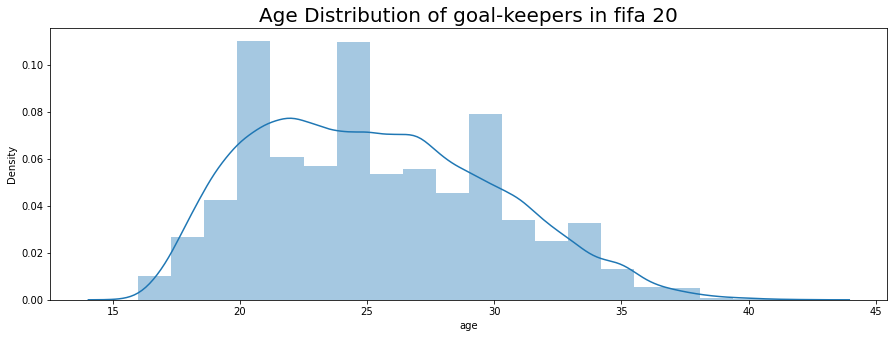

In [152]:

pltly.figure(figsize=(15,5))
pltly.title('Age Distribution of goal-keepers in fifa 20', fontsize=20)
sn.distplot(a=dataset['age'], kde=True, bins=20)

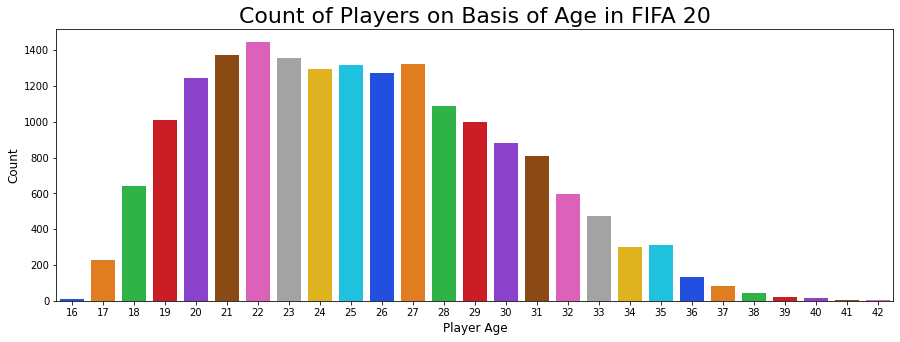

In [153]:
#setting up the figure size
pltly.figure(figsize= (15,5))

#setting the values for the bar graph
a = sn.countplot(x='age', data=dataset, palette='bright')

#setting the title for the graph
a.set_title(label='Count of Players on Basis of Age in FIFA 20', fontsize=22)

#labelling x and y axis
a.set_xlabel(xlabel='Player Age', fontsize=12)
a.set_ylabel(ylabel='Count', fontsize=12)

pltly.show()

- The age of maximum players lie between 20 to 27 years with a mean of around 25 years¶
- The minimum age of the players in the game is 16 years whereas the maximum age is 42 year

In [154]:
#displaying the count of players according to their nationality
dataset['nationality'].value_counts().head()

England      1667
Germany      1216
Spain        1035
France        984
Argentina     886
Name: nationality, dtype: int64

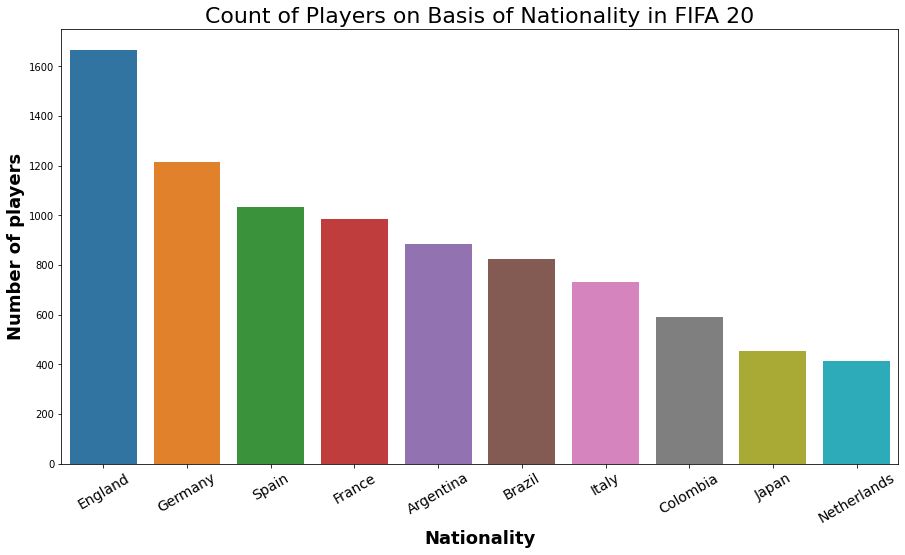

In [155]:
# Here we are displaying the bar graph for number of players according to their nationality
pltly.figure(figsize= (15, 8))

#dataset from which data needs to be fetched
a = sn.countplot(x='nationality', data=dataset, palette=None, order=dataset.nationality.value_counts().iloc[:10].index)

#title for the graph
a.set_title(label='Count of Players on Basis of Nationality in FIFA 20', fontsize=22)

#labelling x and y axis
a.set_xlabel(xlabel='Nationality', fontsize=18, fontweight = 'bold')
a.set_ylabel(ylabel='Number of players', fontsize=18, fontweight = 'bold')

#setting the current tick location and labels for the x axis
pltly.xticks(rotation=30, fontsize=14)

pltly.show()

In [156]:
#printing the number of players according to their height in cm.
dataset['height_cm'].value_counts()

180    1468
178    1213
185    1193
183    1160
175     990
188     904
182     833
184     820
186     774
177     722
181     704
187     682
176     669
179     641
190     585
173     567
174     483
191     464
170     455
189     439
172     412
193     316
192     290
171     262
168     195
194     173
169     149
196     139
195     136
167     102
165      68
166      60
197      51
198      35
163      29
164      21
199      14
162      12
201      11
200      10
203       6
161       5
202       4
158       3
160       3
159       3
157       1
156       1
205       1
Name: height_cm, dtype: int64

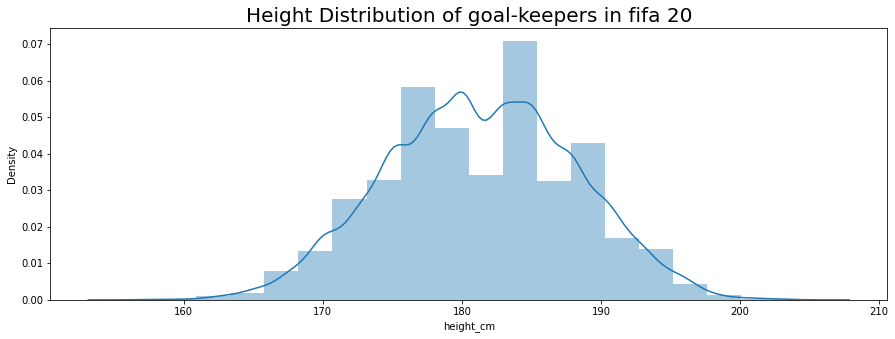

In [157]:
#displaying the graph for players according to their height in cm.

#setting the figure size
pltly.figure(figsize=(15,5))

#setting the title for the graph
pltly.title('Height Distribution of goal-keepers in fifa 20', fontsize=20)

#setting the dataset from which data needs to be fetch
sn.distplot(a=dataset['height_cm'], kde=True, bins=20)

In [158]:
#fetching 'club' and 'overall' columns
d_f = dataset.filter(['club','overall'])
d_f.head()

,club,overall
0,FC Barcelona,94
1,Juventus,93
2,Paris Saint-Germain,92
3,Atlético Madrid,91
4,Real Madrid,91


Text(0, 0.5, 'Number of players')

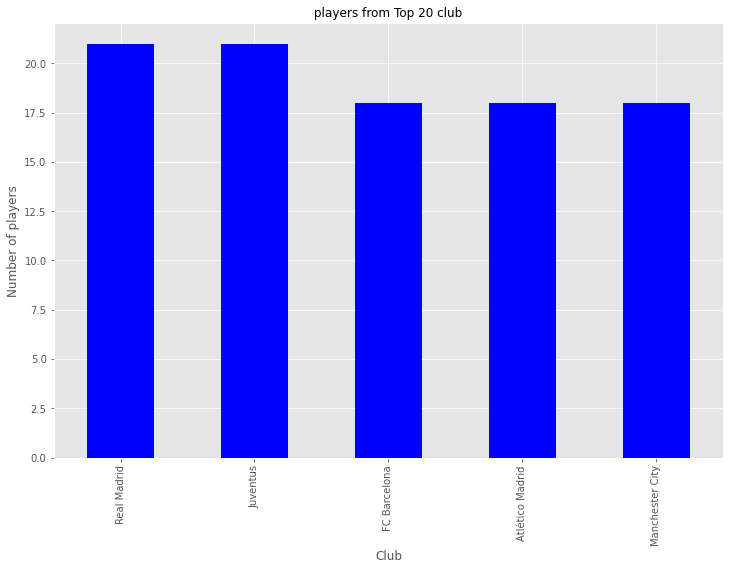

In [159]:
#Here, we are displaying the number of players from top 20 clubs
#fetching the values from overall columns where value is greater than 80
d_f = d_f[d_f.overall>=80]

#count for each club
d_f =d_f['club'].value_counts()
d_f=d_f.head()

#setting the figure size
rcParams['figure.figsize']= 12,8

#setting the color and kind i.e, bar for the graph
with pltly.style.context(('ggplot')):d_f.plot(kind='bar',color = 'blue')

#title of graph
pltly.title(' players from Top 20 club ')

#labelling x and y axis
pltly.xlabel('Club')
pltly.ylabel('Number of players')

In [160]:
#preferred foot count of the players
dataset['preferred_foot'].value_counts()

Right    13960
Left      4318
Name: preferred_foot, dtype: int64

Text(0.5, 1.0, 'Count of Players on Basis of preferred_foot in FIFA 20')

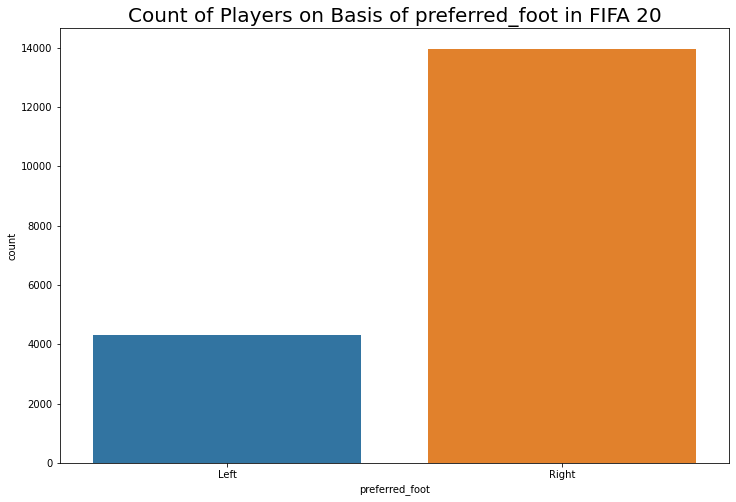

In [161]:
#displaying the preferred foot data on the graph
a = sn.countplot(x='preferred_foot', data=dataset, palette=None)
a.set_title(label='Count of Players on Basis of preferred_foot in FIFA 20', fontsize=20)

# Analyze the data for goal-keepers

In [162]:
dataset['team_position'].isnull().sum()

240

In [163]:
#filling the rows which are having null values
dataset['team_position'].fillna(dataset['team_position'].mode()[0],inplace=True)
dataset.head()

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [164]:
#checking for null values of "team_position" column
dataset['team_position'].isnull().sum()

0

In [165]:
# For goalkeepers, Here we are fetching the players whose team_position column values are "GK" 
data_gkeeper=dataset.loc[dataset['team_position'] == "GK"]
data_gkeeper.head(4)

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3,J. Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,M. ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,90,93,67500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Alisson,26,1992-10-02,191,91,Brazil,Liverpool,89,91,58000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,De Gea,28,1990-11-07,192,82,Spain,Manchester United,89,90,56000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
#fetching players other than Goalkeepers
data_other=dataset.loc[dataset['team_position']!="GK"]
data_other.head(4)

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
4,E. Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [167]:
data_gkeeper_null=data_gkeeper.isnull().sum()
data_gkeeper_null

short_name      0
age             0
dob             0
height_cm       0
weight_kg       0
             ... 
lb            662
lcb           662
cb            662
rcb           662
rb            662
Length: 90, dtype: int64

- Primary traits of a goal keeper are speed, positioning, reflexes, diving and handling. Goal keepers are not much associated with pace, shooting, passing,dribbling or defending. So let us drop some of these columns which don't hold much significance in goalkeeping and have null values,i.e approx 3.6%

In [168]:
#deleting the irrelevant columns for Goalkeeper
data_gkeeper=data_gkeeper.drop(['dob','pace','shooting','passing','dribbling','defending','physic','player_traits',\
                      'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm',\
                      'cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb'],axis=1)
data_gkeeper.head(2)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,...,12,34,19,11,65,11,68,27,12,18
6,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,250000,...,10,43,22,11,70,25,70,25,13,10


In [169]:
#displaying rows and columns
data_gkeeper.shape

(662, 56)

In [170]:
data_gkeeper['overall'].value_counts().head()

66    52
67    49
73    44
68    42
70    42
Name: overall, dtype: int64

- The goal keepers have overall value in the range 50-90, with a mean of 69.

In [172]:
#displaying number of players for different values of wages in euros
data_gkeeper['wage_eur'].value_counts().head()

1000    153
2000    104
3000     73
4000     43
5000     37
Name: wage_eur, dtype: int64

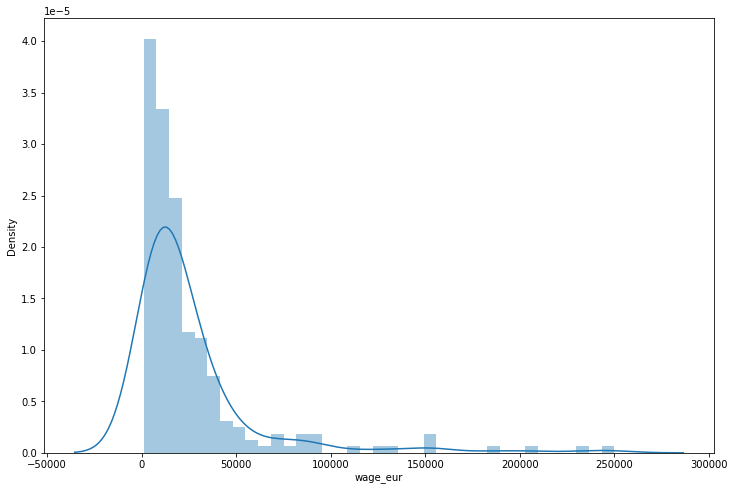

In [ ]:
#Again, displaying data distribution of column 'wage_eur' against density
sn.distplot(a=data_gkeeper['wage_eur'], kde=True)

- The wage seems relatively less about 50K euros for the goalkeepers. The players may have higher wages. 

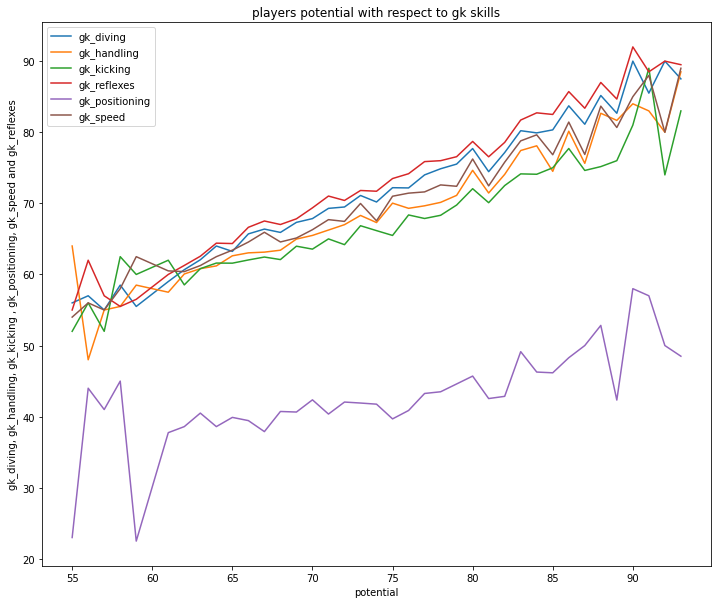

In [173]:
# Here, we are analyzing the traits of goalkeepers like diving, handling, kicking, reflexes, speed, positioning using line graph
rcParams['figure.figsize']= 12,10
sn.lineplot('potential' ,'gk_diving', data=data_gkeeper,legend='brief',ci=None).set_title('players potential with respect to gk skills')
sn.lineplot('potential','gk_handling',data=data_gkeeper,legend='brief',ci=None)
sn.lineplot('potential','gk_kicking',data=data_gkeeper,legend='brief',ci=None)
sn.lineplot('potential','gk_reflexes',data=data_gkeeper,legend='brief',ci=None)
sn.lineplot('potential','gk_speed',data=data_gkeeper,legend='brief',ci=None)
sn.lineplot('potential','gk_positioning',data=data_gkeeper,legend='brief',ci=None).set_ylabel('gk_diving, gk_handling, gk_kicking , gk_positioning, gk_speed and gk_reflexes')
pltly.legend(['gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_positioning','gk_speed'])
pltly.show()

- The handling and reflexes are higher for all the goal keepers, compared to other traits.

# Analysis for players

In [174]:
# For other players
data_other=dataset.loc[dataset['team_position'] != "GK"]
data_other.head(2)

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3


- Drop the insignificant columns which have NaN values

In [175]:
data_other.isnull().sum()

short_name       0
age              0
dob              0
height_cm        0
weight_kg        0
              ... 
lb            1374
lcb           1374
cb            1374
rcb           1374
rb            1374
Length: 90, dtype: int64

In [176]:
#deleting irrevelant columns from other players dataframe
data_other=data_other.drop(['dob','work_rate','real_face','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed',\
                     'gk_positioning','player_traits'],axis=1)
data_other.head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [177]:
data1=data_other
data1
data1.head()


,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [178]:
#filling values in the columns 'joined' and 'contract_valid_untill' using "fillna" function
data1['joined'].fillna(0,inplace=True)
data1['contract_valid_until'].fillna(0,inplace=True)


In [179]:
#setting the format for date in the 'joined' column of the dataset
data1['joined']= pda.to_datetime(data1['joined'], format='%Y-%m-%d',errors='coerce')

In [180]:
data1['contract_valid_until'] =data1['contract_valid_until'].astype(int)
data1['contract_valid_until'].head()

0    2021
1    2022
2    2022
4    2024
5    2023
Name: contract_valid_until, dtype: int64

# Bivariate analysis

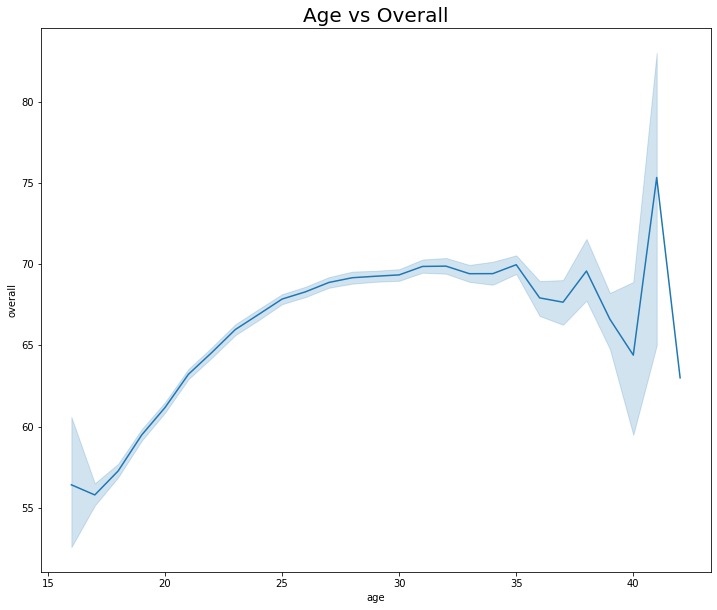

In [181]:
# Comparing Age vs Overall
avp = sn.lineplot(data1['age'], data1['overall'], palette = 'Wistia')

#setting the title for the graph
pltly.title('Age vs Overall', fontsize = 20)

pltly.show()

- In the graph of Overall of the players, we observed that the players are improving with the step of the years. The best players are 30 years old and after that they start to decline. It is seen that in the 40 there is a peak in the graph again, this may be due to the veterans included in the games.

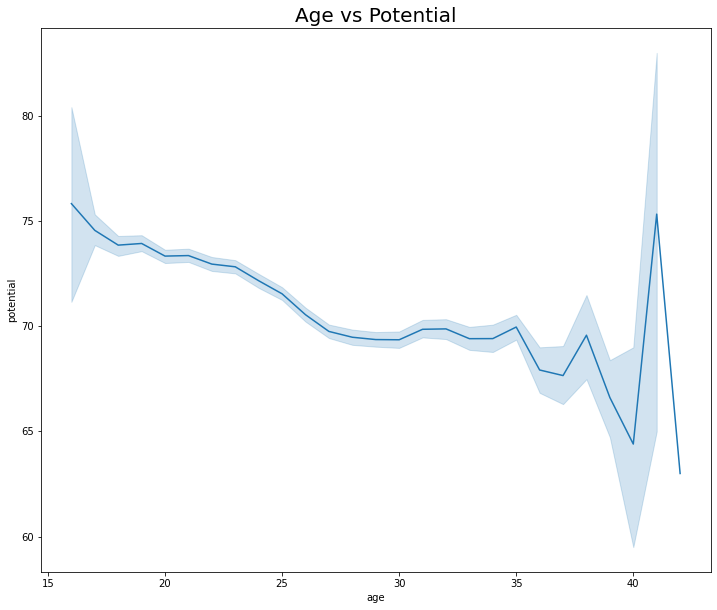

In [182]:
# Comparing Age vs potential
avp = sn.lineplot(data1['age'], data1['potential'], palette = 'Wistia')

#setting the title for the graph
pltly.title('Age vs Potential', fontsize = 20)
pltly.show()

- The potential for players in mid age from 20-30 has almost remained the same with slight variation, & eventually players above 35 have higher potentials, which gradully reduced with increase in age 

In [ ]:
#displaying first five rows of 'wage_eur' column
data1['wage_eur'].head()

0    565000
1    405000
2    290000
4    470000
5    370000
Name: wage_eur, dtype: int64

In [ ]:
#displaying first five rows of 'value_eur' column
data1['value_eur'].head()

0     95500000
1     58500000
2    105500000
4     90000000
5     90000000
Name: value_eur, dtype: int64

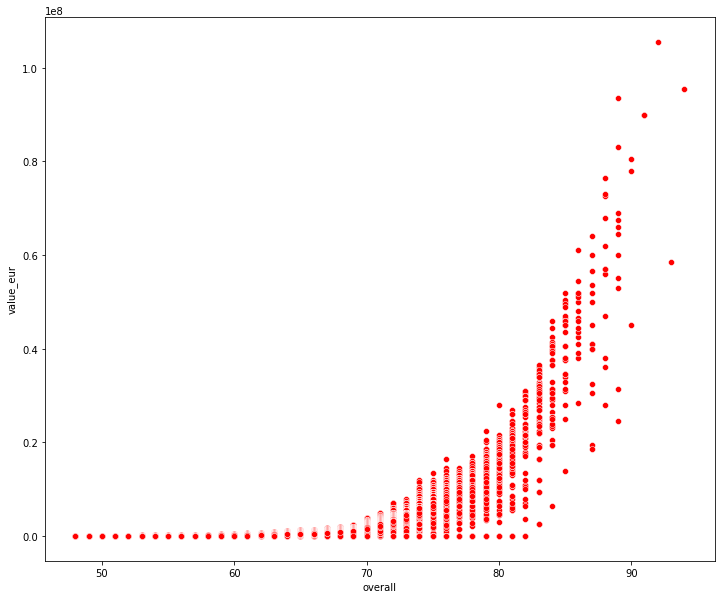

In [ ]:
#implementing data visualization among two columns: 'overall' and 'value_eur' using 'scatterplot' function
sn.scatterplot(x= 'overall' ,y='value_eur', data=data1, color = 'red')

In [ ]:
data1['release_clause_eur'].head()

0    195800000.0
1     96500000.0
2    195200000.0
4    184500000.0
5    166500000.0
Name: release_clause_eur, dtype: float64

In [ ]:
#fetching the count for null values in the column 'release_clause_eur'
data1['release_clause_eur'].isnull().sum()

1257

In [ ]:
#filling the values in the column 'release_clause_eur' using 'mean' function
data1['release_clause_eur']=data1['release_clause_eur'].fillna((data1['release_clause_eur'].mean()))

In [ ]:
#conversion for data type into 'int'
data1['release_clause_eur'] =data1['release_clause_eur'].astype(int)

In [ ]:
#fetching the columns:'value_eur' and 'release_clause_eur'
data_val=data1.loc[:,['value_eur','release_clause_eur']]
data_val.head(10)

,value_eur,release_clause_eur
0,95500000,195800000
1,58500000,96500000
2,105500000,195200000
4,90000000,184500000
5,90000000,166500000
7,78000000,150200000
8,45000000,92300000
9,80500000,148900000
10,93500000,191700000
11,67500000,119800000


Text(0, 0.5, 'value in euros billions')

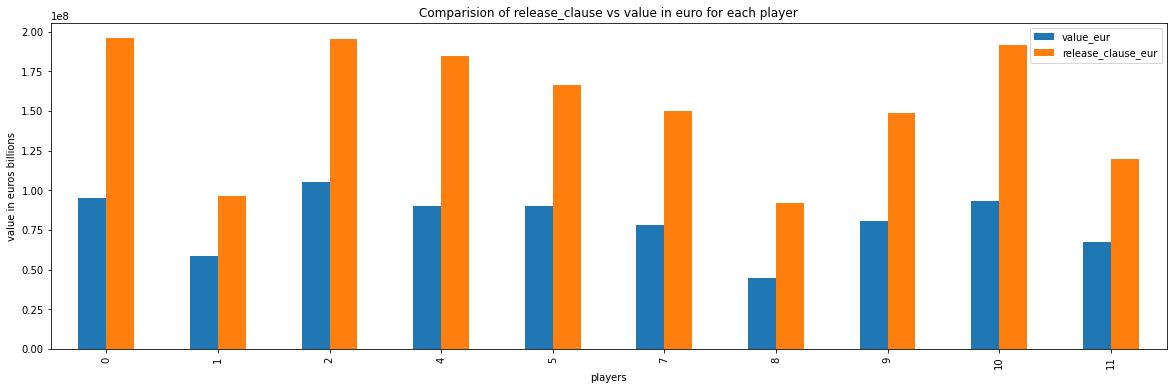

In [ ]:
#displaying bar graph by comparing values of column release_clause vs value in euro for every player

data_val.head(10).plot(kind = 'bar', figsize=(20,6))

#setting title for the graph
pltly.title('Comparision of release_clause vs value in euro for each player')

#labelling x and y axis
pltly.xlabel('players')
pltly.ylabel('value in euros billions')

- The release clause value is always higher than the value of each player.

In [ ]:
data1['international_reputation'].value_counts()

1    16215
2     1082
3      271
4       43
5        5
Name: international_reputation, dtype: int64

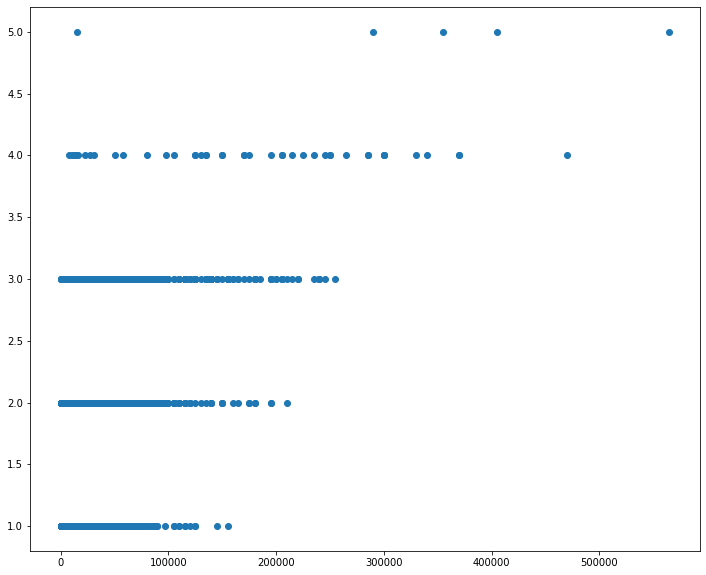

In [ ]:
#using scatter function for visualizing the correlation between values of 'wage_eur' and 'international_reputation' columns
a=data1['wage_eur']
b=data1['international_reputation']
pltly.scatter(a, b)
pltly.show()

- The plot gives a general idea that players with higher reputation have higher wages,and these two columns have a positive correlation

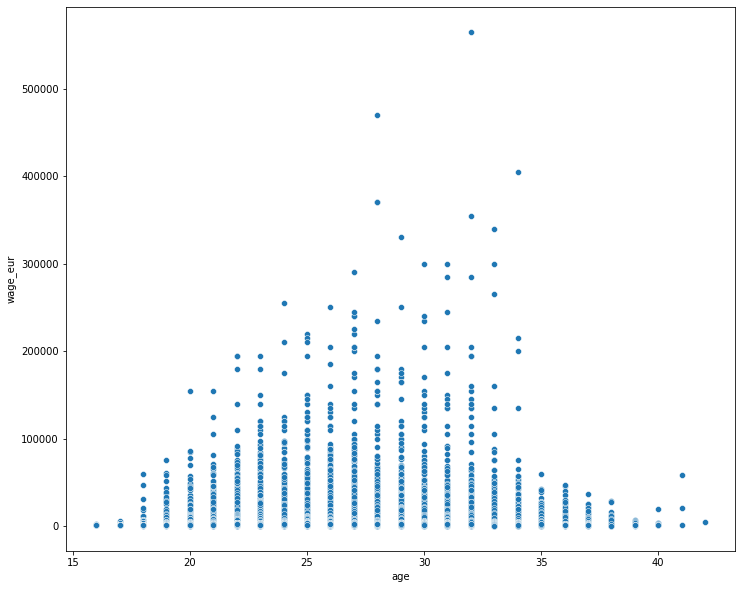

In [ ]:
sn.scatterplot(x= 'age' ,y='wage_eur', data=data1,hue=None)

- The wage is distributed in the mid range with players in the age 20-34 having major amount of wages, it eventually declined with higher age players. Also young players who are considered as beginners also don't have major wages. 

In [ ]:
#filling the values of below columns with mean value using 'mean' function
data1['pace'] = data1['pace'].fillna((data1['pace'].mean()))
data1['shooting'] = data1['shooting'].fillna((data1['shooting'].mean()))
data1['passing'] = data1['passing'].fillna((data1['passing'].mean()))
data1['dribbling'] = data1['dribbling'].fillna((data1['dribbling'].mean()))
data1['defending'] = data1['defending'].fillna((data1['defending'].mean()))
data1['physic'] = data1['physic'].fillna((data1['physic'].mean()))

In [ ]:
#fetching the mentioned columns
df = data1.loc[:,['short_name','defending','physic','pace','shooting','dribbling','passing']]
df.head()

,short_name,defending,physic,pace,shooting,dribbling,passing
0,L. Messi,39.0,66.0,87.0,92.0,96.0,92.0
1,Cristiano Ronaldo,35.0,78.0,90.0,93.0,89.0,82.0
2,Neymar Jr,32.0,58.0,91.0,85.0,95.0,87.0
4,E. Hazard,35.0,66.0,91.0,83.0,94.0,86.0
5,K. De Bruyne,61.0,78.0,76.0,86.0,86.0,92.0


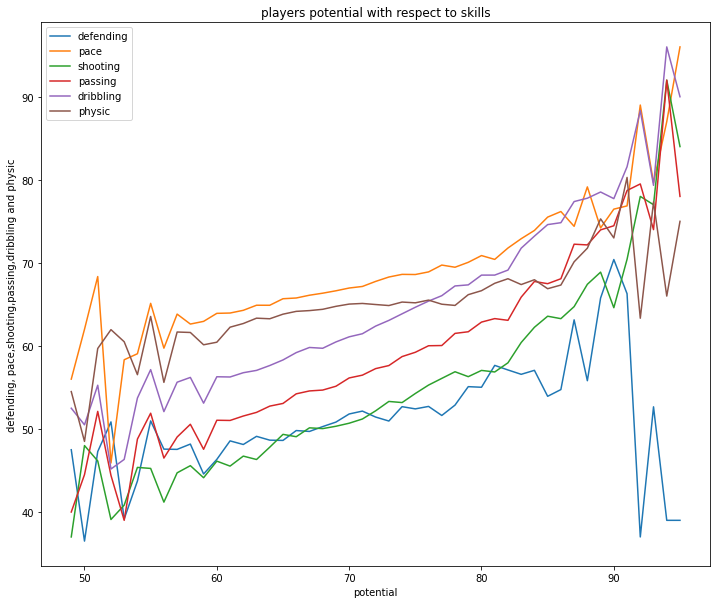

In [ ]:
#Here, we are analyzing various skills of the players like defending, pace, shooting , passing etc using line graph
rcParams['figure.figsize']= 12,10
sn.lineplot('potential' ,'defending', data=data1,legend='brief',ci=None).set_title('players potential with respect to skills')
sn.lineplot('potential','pace',data=data1,legend='brief',ci=None)
sn.lineplot('potential','shooting',data=data1,legend='brief',ci=None)
sn.lineplot('potential','passing',data=data1,legend='brief',ci=None)
sn.lineplot('potential','dribbling',data=data1,legend='brief',ci=None)
sn.lineplot('potential','physic',data=data1,legend='brief',ci=None).set_ylabel('defending, pace,shooting,passing,dribbling and physic')
pltly.legend(['defending','pace','shooting','passing','dribbling','physic'])
pltly.show()

- We can analyze players have steady increase in traits like dribbling,pace & shooting above the potential of 60, and less defending skills. 

- Also we can observe that the players are in different positions in team_position, so let us create another position that can be one for the following five:
- Reserve
- Substitute
- Defender
- Midfielder
- Forward

In [ ]:
#This function basically returns the role of players depending on positions of the players.
def label_pos (row):
    if(row.team_position == "RB" or row.team_position == "CB" or row.team_position == "LB" or 
       row.team_position == "LWB" or row.team_position == "RCB"or row.team_position == "RWB" or 
       row.team_position == "LCB"):
        return 'Defender'
    if(row.team_position == "RW" or row.team_position == "CF" or row.team_position == "LW" or 
       row.team_position == "ST" or row.team_position == "RS"or row.team_position == "LS"
       or row.team_position == "LF"or row.team_position == "RF"):
        return 'Forward'
    if(row.team_position == "RM" or row.team_position == "CM" or row.team_position == "LM"
       or row.team_position == "CAM" or row.team_position == "LDM" or row.team_position == "RDM"
      or row.team_position == "LAM"or row.team_position == "RAM" or row.team_position == "CDM"
       or row.team_position == "RCM"or row.team_position == "LCM"):
        return 'MidFielder'
    if (row.team_position == "SUB"):
        return 'Substitute'
    if (row.team_position == "RES"):
        return 'Reserve'
    return "other"

data1['field_position'] = data1.apply (lambda row: label_pos(row), axis=1)

- Let us analyze the main characteristics like pace,shooting,passing,dribbling,defending,physic & overall according to each position.

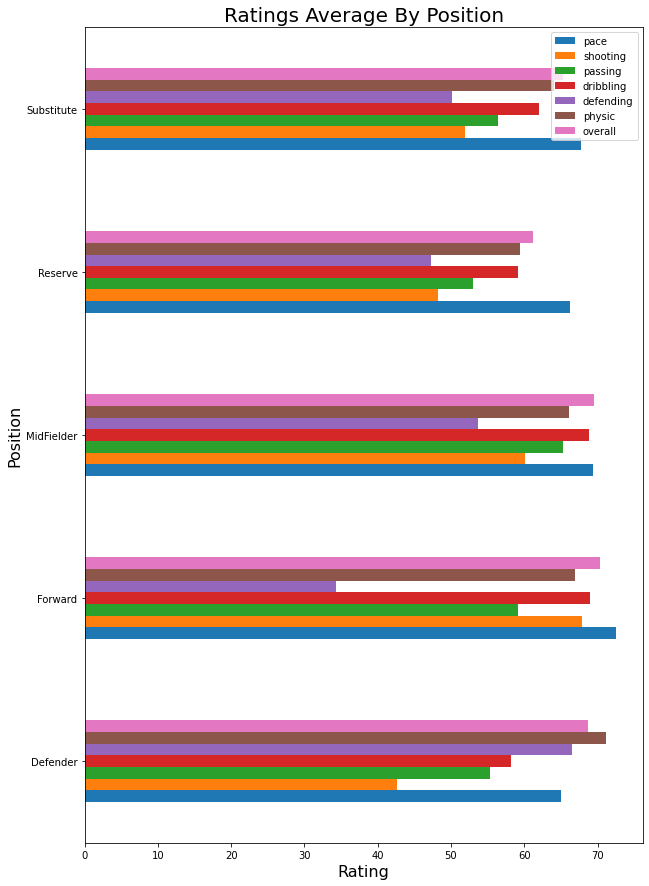

In [ ]:
#grouping the players according to their Field Position and setting the values in the rows with mean using 'mean' function 
ratingsByPositions = data1.groupby([data1['field_position']]).mean()

ratingsByPositions = ratingsByPositions

#fetching some particular columns
ratingsByPositions = ratingsByPositions[['pace','shooting','passing','dribbling','defending','physic','overall']]

#making bar graph for the above selected columns
ratingsByPositions.plot(kind='barh', figsize=(10,15))

#setting title for the graph
pltly.title('Ratings Average By Position',fontsize=20)

#labelling x axis and y axis
pltly.xlabel('Rating',fontsize=16)
pltly.ylabel('Position',fontsize=16);

- We can see that the traits change for each player wrt to the position in which they are playing. The mid-fielder and forward have higher shooting and dribbling whereas the defender has more defending trait compared to other players.

Text(0, 0.5, '')

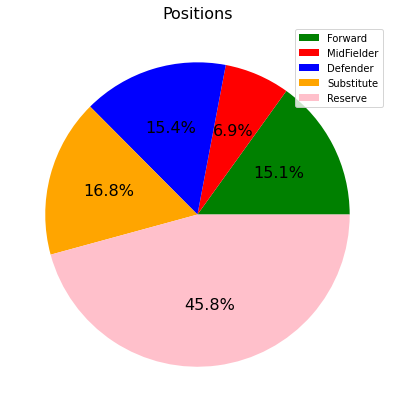

In [ ]:
#grouping players according to their position in the field
by_pos = data1.groupby(data1['field_position']).count().age

#plotting Pie chart 
by_pos.plot(kind='pie',figsize=(7,7), colors=['green','red','blue','orange','pink','grey'], labels=None, autopct='%1.1f%%', fontsize=16)

pltly.legend(labels=data1['field_position'].unique())

#title for the chart
pltly.title('Positions', fontsize=16)
pltly.ylabel('')

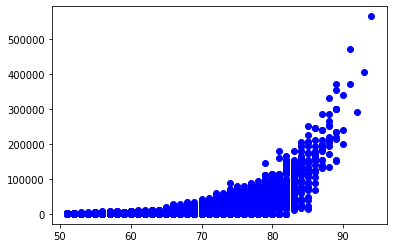

In [ ]:
%matplotlib inline
#selecting the rows with values more than 50 in 'overall' column
y=data1[data1["overall"]>50]

#scatter plot for 'overall' and 'wage_eur' column
pltly.scatter(y["overall"],y["wage_eur"],color="blue")

- The wages are significantly higher for players with overall above 90 

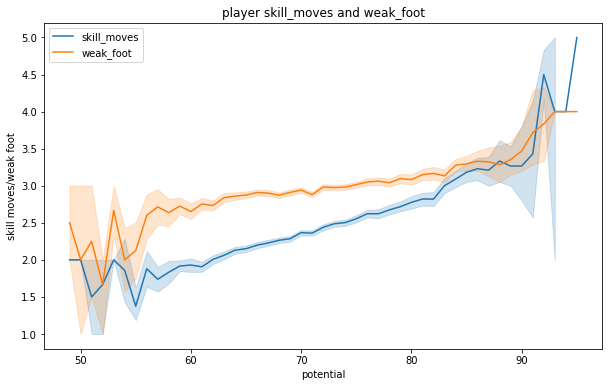

In [ ]:
# Analyzing the potential of players with more skill_moves vs weak_foot
rcParams['figure.figsize']= 10,6

#plotting line graph for skill_moves and weak_foot
sn.lineplot('potential' ,'skill_moves', data=data1,legend='brief').set_title('player skill_moves and weak_foot')
sn.lineplot('potential','weak_foot',data=data1,legend='brief').set_ylabel('skill moves/weak foot')
pltly.legend(['skill_moves','weak_foot'])
pltly.show()

- Players with more skill_moves are stable as compared to players who have weak_foot

Text(0.5, 0, 'skill move and weak foot')

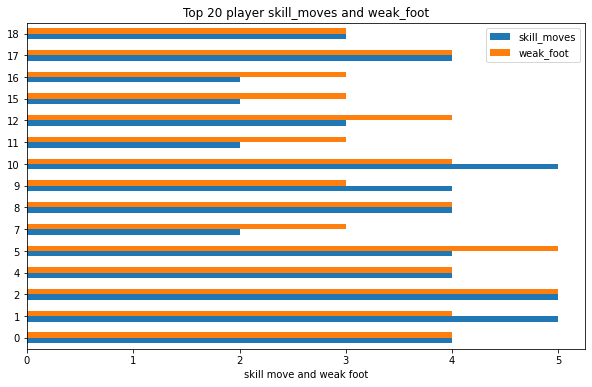

In [ ]:
# Analyzing skill_moves vs weak_foot of top 20 players
data1_sw = data1.loc[:,['skill_moves','weak_foot']]
data1_sw = data1_sw.head(15)

# display using bar graph
data1_sw.plot(kind = 'barh', figsize=(10,6) )

#title of the graph
pltly.title('Top 20 player skill_moves and weak_foot')

#labelling x axis
pltly.xlabel('skill move and weak foot')

- The above plot denotes weather players are able to balance their skill moves with weak_foot.

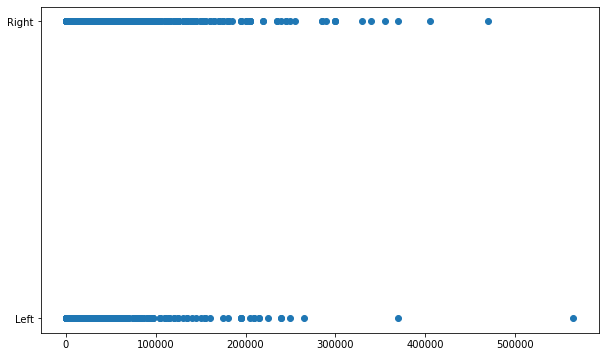

In [ ]:
#scatter plot for wage vs preferred foot of players
x=data1['wage_eur']
y=data1['preferred_foot']
pltly.scatter(x, y)
pltly.show()

- We can asses from the above plot that although more players are Right footed, but the left footed players have higher wage in euros. That can be due to their potential in playing. Further analysis is needed to determine this factor

Text(0.5, 1.0, 'Bodytype vs wage in eur')

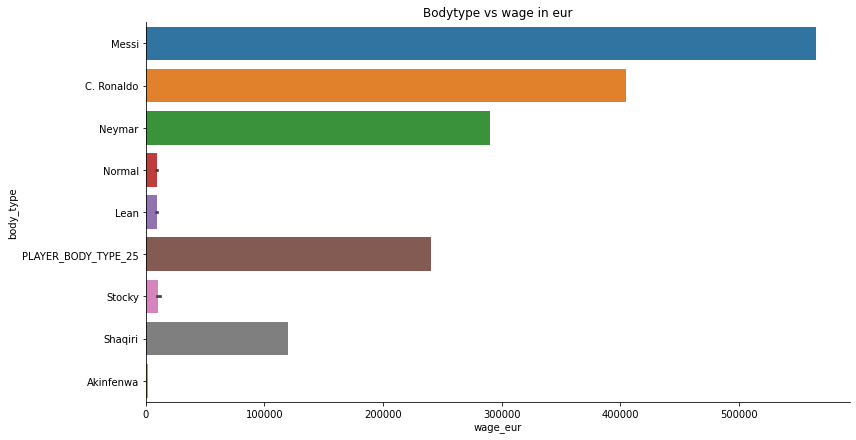

In [ ]:
#plotting bar graph for Bodytype vs wage (euro)
sn.catplot(y="body_type",
            x="wage_eur",data=data1,
           height=6,kind="bar",aspect=2)
#title of the graph
pltly.title("Bodytype vs wage in eur")

- The wages are significantly higher for players like Messi, Neymar and Ronaldo irrespective of their body type.

In [ ]:
#fetching the columns
columns = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']


In [ ]:
#using the split function fixing the values of the above columns
for col in columns:
     data1[col]=data1[col].str.split('+',n=1,expand = True)[0]        
data1[['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']]=data1[columns]

#filling the null values
data1[columns] = data1[columns].fillna(0)

data1.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,field_position
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,66,66,66,68,63,52,52,52,63,Forward
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,61,61,61,65,61,53,53,53,61,Forward
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,61,61,61,66,61,46,46,46,61,MidFielder
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,63,63,63,66,61,49,49,49,61,Forward
5,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,...,77,77,77,77,73,66,66,66,73,MidFielder


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
#converting values of the mentioned columns into number using LabelEncoder
data1.loc[:,['nationality','club','body_type','team_position','field_position','preferred_foot']]=data1.loc[:,['nationality','club','body_type','team_position','field_position','preferred_foot']].apply(LabelEncoder().fit_transform)
data1.head(2)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,field_position
0,L. Messi,32,170,72,5,224,94,94,95500000,565000,...,66,66,66,68,63,52,52,52,63,1
1,Cristiano Ronaldo,34,187,83,120,350,93,93,58500000,405000,...,61,61,61,65,61,53,53,53,61,1


In [ ]:
#minimum value in the 'overall' column
data1['overall'].min()

48

# Clustering analysis

- Let us do K-means clustering to cluster the players based on their traits and different skills 

In [ ]:
#displaying all columns
data1.columns

Index(['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club',
       'overall', 'potential', 'value_eur', 'wage_eur', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'body_type',
       'release_clause_eur', 'team_position', 'joined', 'contract_valid_until',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'men

In [ ]:
#selecing some columns
data1=data1[['short_name','age','overall','value_eur','international_reputation','skill_moves',\
             'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',\
             'field_position']]

In [ ]:
#selecting the rows having value greater than 50 in 'overall' column
data1 = data1[data1.overall > 50]


In [ ]:
names = data1.short_name.tolist()


In [ ]:
# deleting the short_name column
data1 = data1.drop(['short_name'], axis = 1) 


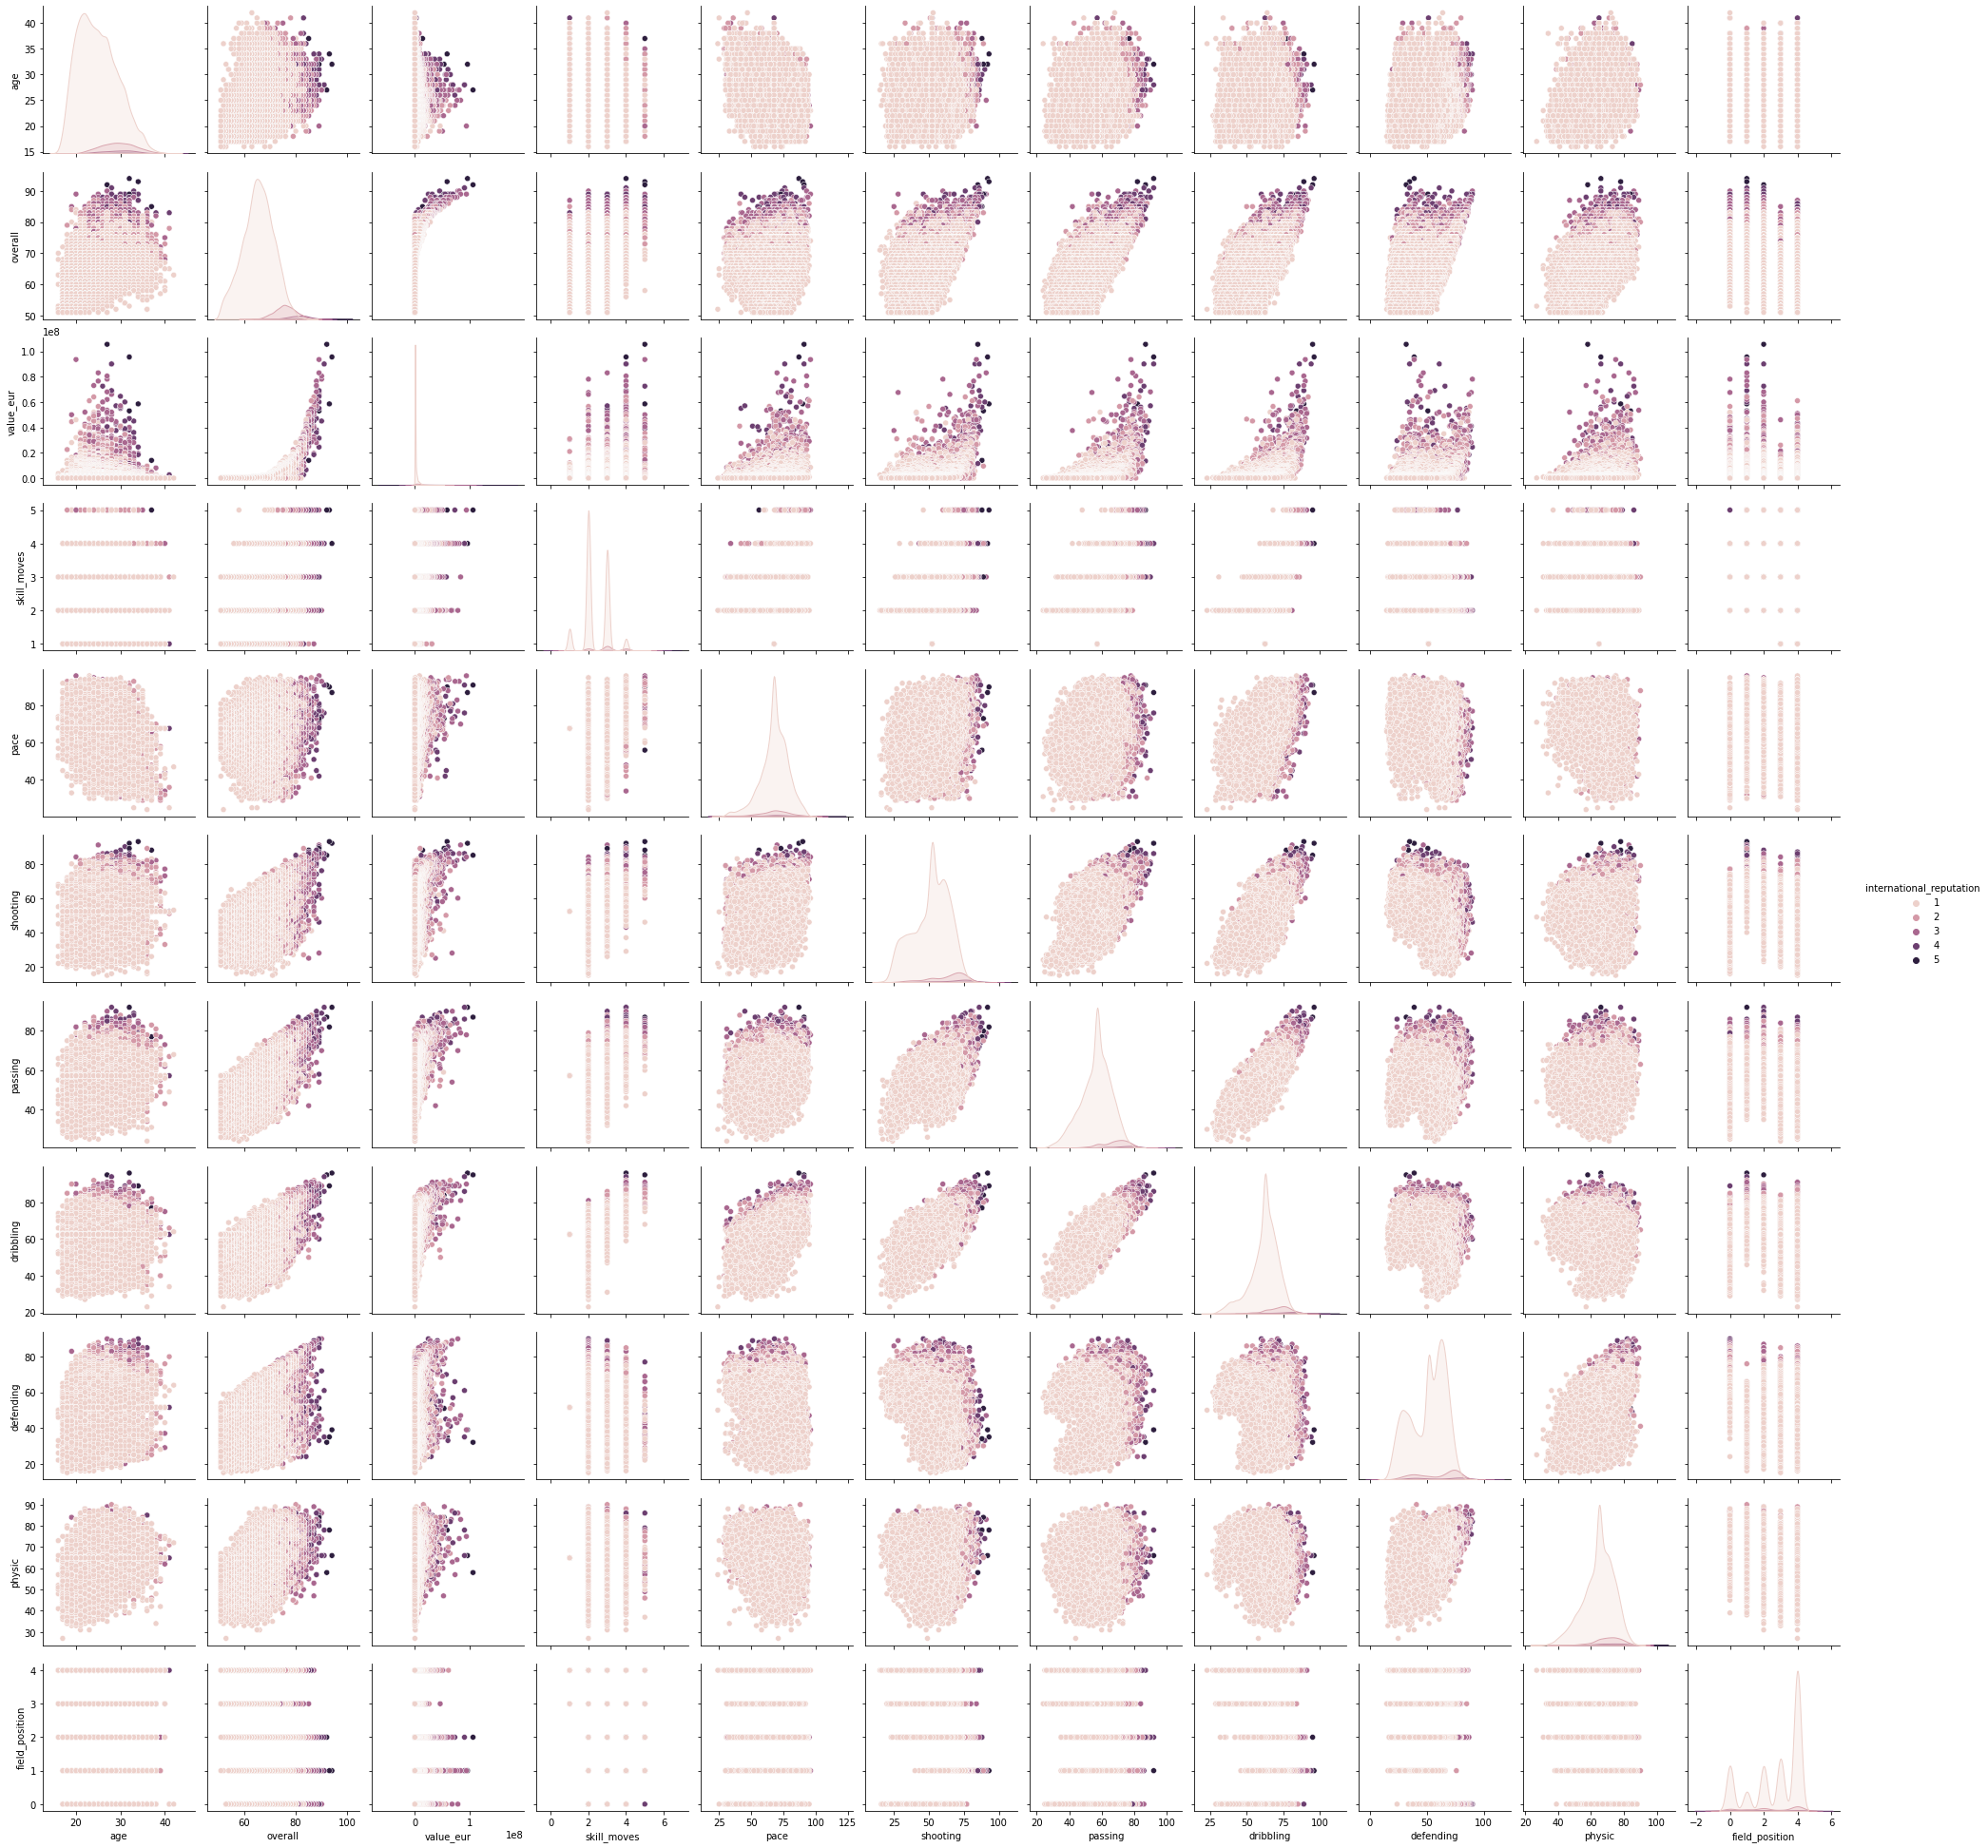

In [ ]:
#pairplot with hue international_reputation
sn.pairplot(data1,hue ='international_reputation' )

In [ ]:
#importing required libraries
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [ ]:
from sklearn import preprocessing
x = data1.values # numpy array

#Scaling the values between 0 and 1
x_scaled = preprocessing.MinMaxScaler().fit_transform(x)
X_norm = pda.DataFrame(x_scaled)


In [ ]:
#K means to determine K
distortions = []
K=range(1,10)
for k in K:
    kmeanModel=KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(sum(npy.min(cdist(x,kmeanModel.cluster_centers_,'euclidean'),axis=1))/x.shape[0])

In [ ]:
distortions

[2797872.2865698314,
 2025600.6647818522,
 1229278.1640664528,
 1031331.569290064,
 808574.2956931648,
 698714.8437590272,
 628462.8539377732,
 564307.4072532553,
 540993.954967589]

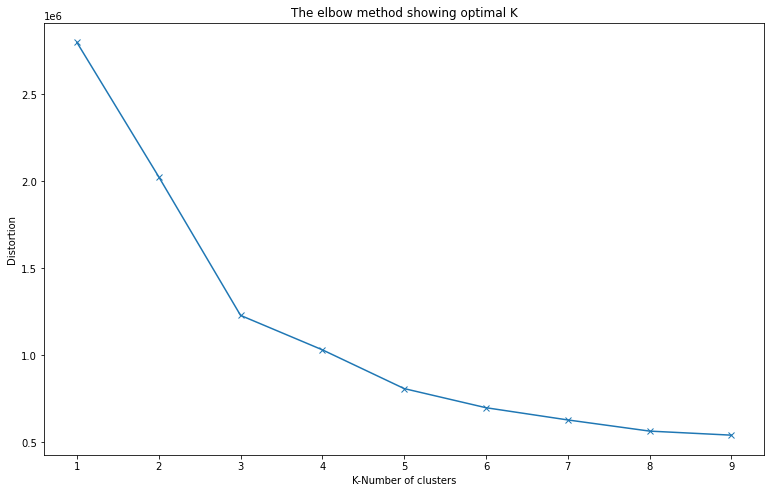

In [ ]:
#Using the Elbow method for displaying optimal K
fig=pltly.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_xticks(range(1,25))

#labelling x and y axis
ax.set_xlabel('K-Number of clusters')
ax.set_ylabel('Distortion')

#title
ax.set_title('The elbow method showing optimal K')
ax.plot(K,distortions,marker='x')
pltly.show()

In [ ]:
km =KMeans(n_clusters = 3)
km
y_predicted=km.fit_predict(data1[['age','overall','value_eur','field_position','international_reputation',\
                                 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',\
                                 'skill_moves']])
y_predicted

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
km.cluster_centers_

array([[2.51131867e+01, 6.48440034e+01, 1.05600246e+06, 2.76616722e+00,
        1.03826944e+00, 6.71776459e+01, 5.09287925e+01, 5.59057172e+01,
        6.12850099e+01, 5.07248133e+01, 6.42625626e+01, 2.33904132e+00],
       [2.63250000e+01, 8.47200000e+01, 4.00025000e+07, 1.73000000e+00,
        2.66000000e+00, 7.67970090e+01, 7.22579830e+01, 7.64423378e+01,
        8.07403158e+01, 5.93405350e+01, 7.22437668e+01, 3.48500000e+00],
       [2.61303132e+01, 7.68713647e+01, 1.04161074e+07, 2.26789709e+00,
        1.47595078e+00, 7.17958764e+01, 6.33881147e+01, 6.81230499e+01,
        7.27919170e+01, 5.90154391e+01, 7.06550897e+01, 3.06375839e+00]])

In [ ]:
X = data1.values

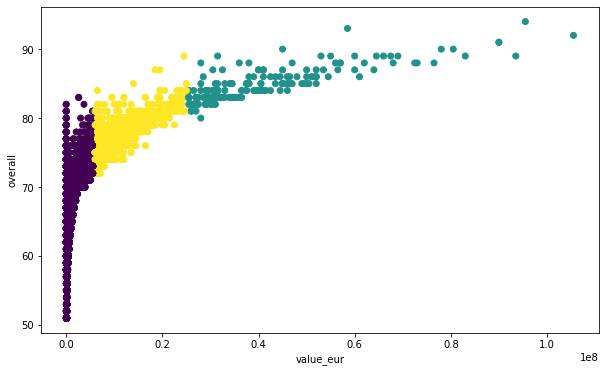

In [ ]:
pltly.scatter(X[:, 2], X[:, 1],c=y_predicted.astype(npy.float))
pltly.xlabel('value_eur')
pltly.ylabel('overall')

pltly.show()

- The algorithm has classified the players into 3 clusters with yellow color clusters having more wages and overall increased traits. The teal color ones have overall ratings from 70-90 with mid range values in euros. The purple cluster players have overall from 50-80 and have lower value in euros. 